# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib as mpl

# set the style as 'bmh'
mpl.style.use('bmh')


# Import API key
from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Weather API Key
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create empty list
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter
record = 1

# Log file 
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through cities
for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
              
        # Increases counter by one
        record = record + 1
        
        # timer to not exceed limit of API
        time.sleep(1.01)
     
    # Skip if city not found           
    except: 
        print("City not found. Skipping...")
    continue
                                

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=fare
Processing Record 2 | Aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=aden
Processing Record 3 | Manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=manta
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=busselton
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 5 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=punta arenas
Processing Record 6 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=saint-augustin
Pro

Processing Record 56 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=codrington
Processing Record 57 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=havre-saint-pierre
Processing Record 58 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=kodiak
Processing Record 59 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=atuona
Processing Record 60 | Maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=maningrida
Processing Record 61 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=souillac
Processing Record 62 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f506

Processing Record 112 | Lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=lorengau
Processing Record 113 | Ouangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ouangani
Processing Record 114 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=praia
Processing Record 115 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=khatanga
Processing Record 116 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=east london
City not found. Skipping...
Processing Record 117 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=vila franca do campo
Processing Record 118 | Tasiilaq
http://api.openweathermap.org/data/2.5/weathe

Processing Record 168 | Kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=kidal
City not found. Skipping...
Processing Record 169 | Pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=pochutla
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 170 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=yellowknife
Processing Record 171 | Ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ossora
Processing Record 172 | Parabel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=parabel
Processing Record 173 | Nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=nchelenge
Processing Record 174 

Processing Record 224 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=lagoa
Processing Record 225 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=iqaluit
City not found. Skipping...
Processing Record 226 | Oeiras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=oeiras
Processing Record 227 | Moussoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=moussoro
Processing Record 228 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=saskylakh
Processing Record 229 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=pisco
City not found. Skipping...
Processing Record 230 | Maryville
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 278 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=bambous virieux
Processing Record 279 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=rio grande
Processing Record 280 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=pevek
Processing Record 281 | Harvard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=harvard
Processing Record 282 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=meulaboh
Processing Record 283 | Opole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=opole
Processing Record 284 | Abu Zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6e

Processing Record 334 | Redmond
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=redmond
Processing Record 335 | San Quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=san quintin
Processing Record 336 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=hamilton
Processing Record 337 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=broken hill
City not found. Skipping...
Processing Record 338 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=torbay
Processing Record 339 | Sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=sumbe
Processing Record 340 | Ouesso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703

Processing Record 390 | Phan Thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=phan thiet
City not found. Skipping...
Processing Record 391 | Batavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=batavia
Processing Record 392 | Requena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=requena
Processing Record 393 | Marihatag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=marihatag
Processing Record 394 | Santa Leopoldina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=santa leopoldina
Processing Record 395 | Kaseda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=kaseda
Processing Record 396 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 446 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=grindavik
Processing Record 447 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=makakilo city
Processing Record 448 | New Ulm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=new ulm
Processing Record 449 | Gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=gorontalo
Processing Record 450 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=itoman
Processing Record 451 | Nha Trang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=nha trang
Processing Record 452 | Clearlake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063

Processing Record 502 | Masaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=masaka
Processing Record 503 | Muroto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=muroto
City not found. Skipping...
Processing Record 504 | Erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=erenhot
Processing Record 505 | Tshikapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=tshikapa
Processing Record 506 | Mogadouro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=mogadouro
City not found. Skipping...
Processing Record 507 | Kasongo-Lunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=kasongo-lunda
Processing Record 508 | Muros
http://api.openweathermap.org/data/2.5/wea

In [5]:
# Create a dictionary 
weatherpy_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a DataFrame using dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Remove NaN rows and Count of weather data
weather_data = weather_data.dropna()
weather_data.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [6]:
# Save DataFrame to CSV
weather_data.to_csv("Plot_Outputs/weather_data.csv")

In [7]:
# Display DataFrame Head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fare,2,PF,1563026359,81,-16.70,-151.02,76.60,4.79
1,Aden,68,YE,1563026194,45,12.79,45.03,95.68,7.20
2,Manta,100,RO,1563026361,64,45.10,24.10,69.76,5.19
3,Busselton,0,AU,1563026362,61,-33.64,115.35,46.99,16.60
4,Punta Arenas,90,CL,1563026364,100,-53.16,-70.91,39.20,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

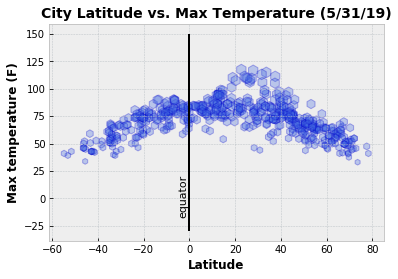

In [8]:
# Scatter Plot - Latitude vs. Temperature Plot
# Used hexagon1 as marker

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="h", s = max_temp * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.3, linewidth = 1.0)

# Graph Properties
plt.title("City Latitude vs. Max Temperature (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Max temperature (F)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0,-30,150)
plt.text(-5,15,'equator', rotation=90, fontsize = 11)

# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_Max_temp.png", bbox_inches="tight", dpi=150)


#Show Scatter Plot
plt.show()

#### Latitude vs. Humidity Plot

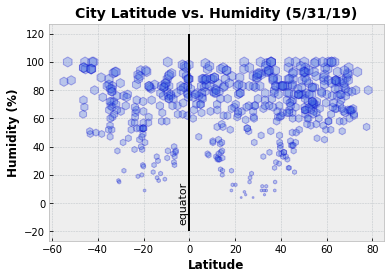

In [9]:
# Scatter Plot - Latitude vs. Humidity Plot
# Used hexagon1 as marker
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="h", s = humidity * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.3, linewidth = 1.0, zorder=2)

# Graph Properties
plt.title("City Latitude vs. Humidity (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Humidity (%)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0, -20, 120)
plt.text(-5,10,'equator', rotation=90, fontsize = 11)



# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_Humidity.png", bbox_inches="tight", dpi=150)

#Show Scatter Plot
plt.show()

#### Latitude vs. Cloudiness Plot

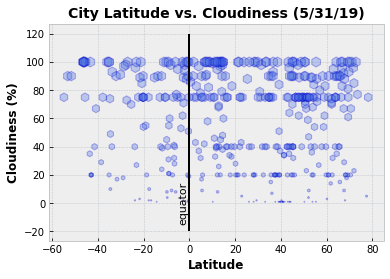

In [10]:
# Scatter Plot - Latitude vs. Cloudiness Plot
# Used hexagon1 as marker
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="h", s = cloudiness * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.3, linewidth = 1.0, zorder=2)

# Graph Properties
plt.title("City Latitude vs. Cloudiness (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Cloudiness (%)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0, -20, 120)
plt.text(-5,10,'equator', rotation=90, fontsize = 11)


# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_Cloudiness.png", bbox_inches="tight", dpi=150)

#Show Scatter Plot
plt.show()

#### Latitude vs. Wind Speed Plot

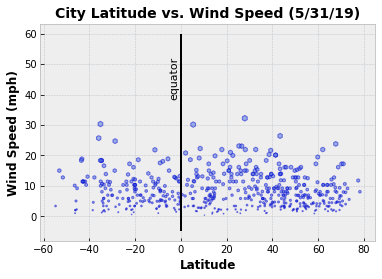

In [11]:
# Scatter Plot - Latitude vs. Wind Speed Plot
# Used hexagon1 as marker
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="h", s = wind_speed * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.5, linewidth = 1.0, zorder=2)

# Graph Properties
plt.title("City Latitude vs. Wind Speed (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Wind Speed (mph)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0,-5,60)
plt.text(-5,50,'equator', rotation=90, fontsize = 11)

# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_WindSpeed.png", bbox_inches="tight", dpi=150)

#Show Scatter Plot
plt.show()

In [12]:
html_table = weather_data.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City</th>\n      <th>Cloudiness</th>\n      <th>Country</th>\n      <th>Date</th>\n      <th>Humidity</th>\n      <th>Lat</th>\n      <th>Lng</th>\n      <th>Max Temp</th>\n      <th>Wind Speed</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Fare</td>\n      <td>2</td>\n      <td>PF</td>\n      <td>1563026359</td>\n      <td>81</td>\n      <td>-16.70</td>\n      <td>-151.02</td>\n      <td>76.60</td>\n      <td>4.79</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Aden</td>\n      <td>68</td>\n      <td>YE</td>\n      <td>1563026194</td>\n      <td>45</td>\n      <td>12.79</td>\n      <td>45.03</td>\n      <td>95.68</td>\n      <td>7.20</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Manta</td>\n      <td>100</td>\n      <td>RO</td>\n      <td>1563026361</td>\n      <td>64</td>\n      <td>45.10</td>\n      <td>24.10</td>\n      <td